In [1]:
!pip install torch==1.13.1+cu117 torchvision==0.14.1+cu117 torchaudio==0.13.1+cu117 --user -f https://download.pytorch.org/whl/cu117/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cu117/torch_stable.html


In [2]:
import pandas as pd

In [25]:
import torch
from tqdm.notebook import tqdm

from transformers import BertTokenizer,RobertaTokenizer
from torch.utils.data import TensorDataset

from transformers import BertForSequenceClassification

from transformers import RobertaConfig, RobertaForSequenceClassification, RobertaTokenizer

df = pd.read_csv('C:/Users/JenMing/Desktop/MBTI/MBTI_test.csv')
df.head()

type  \
0  INFJ   
1  ENTP   
2  INTP   
3  INTJ   
4  ENTJ   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [26]:
import string
import re

def clean_text(text):
    regex = re.compile('[%s]' % re.escape('|'))
    text = regex.sub(" ", text)
    words = str(text).split()
    #words = [i.lower() + " " for i in words]
    #words = [i for i in words if not "http" in i]
    words = " ".join(words)
    #words = words.translate(words.maketrans('', '', string.punctuation))
    return words

df['posts'] = df['posts'].apply(clean_text)

In [27]:
df['type'].value_counts()

INFP    1832
INFJ    1469
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

In [28]:
possible_labels = df.type.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{'INFJ': 0,
 'ENTP': 1,
 'INTP': 2,
 'INTJ': 3,
 'ENTJ': 4,
 'ENFJ': 5,
 'INFP': 6,
 'ENFP': 7,
 'ISFP': 8,
 'ISTP': 9,
 'ISFJ': 10,
 'ISTJ': 11,
 'ESTP': 12,
 'ESFP': 13,
 'ESTJ': 14,
 'ESFJ': 15}

In [20]:
# 調整顯示設置
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

In [29]:
df['label'] = df.type.replace(label_dict)

In [30]:
type_index_mapping = {
    'ESTJ': '0000',
    'ISTJ': '1000',
    'INTJ': '1100',
    'INFJ': '1110',
    'INFP': '1111',
    'INTP': '1101',
    'ISTP': '1001',
    'ISFJ': '1010',
    'ISFP': '1011',
    'ESTP': '0001',
    'ESFJ': '0010',
    'ESFP': '0011',
    'ENTJ': '0100',
    'ENFP': '0111',
    'ENTP': '0101',
    'ENFJ': '0110'
}

df['type_index'] = df['type'].replace(type_index_mapping)

In [31]:
df.head()

type  \
0  INFJ   
1  ENTP   
2  INTP   
3  INTJ   
4  ENTJ   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [32]:
from sklearn.model_selection import train_test_split

#在資料集裡面, 我們會選取特徵 (就是"x") , 對應特徵的部分, 會有 Label (標記), (就是"y")
# 假设 df 包含特征 'X' 和标签 'label'
X_train, X_temp, y_train, y_temp = train_test_split(df.index.values, df.label.values, test_size=0.3, random_state=42, stratify=df['label'].values)

# 进一步划分剩余的数据为验证集和测试集
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


In [33]:
df['data_type'] = ['not_set']*df.shape[0]

X_train_flat = X_train.flatten()
X_val_flat = X_val.flatten()
X_test_flat = X_test.flatten()

df.loc[X_train_flat, 'data_type'] = 'train'
df.loc[X_val_flat, 'data_type'] = 'val'
df.loc[X_test_flat, 'data_type'] = 'test'

df.groupby(['type', 'label', 'data_type']).count()

posts  type_index
type label data_type                   
ENFJ 5     test          28          28
           train        133         133
           val           29          29
ENFP 7     test         102         102
           train        472         472
           val          101         101
ENTJ 4     test          34          34
           train        162         162
           val           35          35
ENTP 1     test         103         103
           train        479         479
           val          103         103
ESFJ 15    test           6           6
           train         29          29
           val            7           7
ESFP 13    test           7           7
           train         34          34
           val            7           7
ESTJ 14    test           6           6
           train         27          27
           val            6           6
ESTP 12    test          13          13
           train         62          62
           val           14          14
INFJ 0     test         221         221
           train       1028        1028
           val          220         220
INFP 6     test         275         275
           train       1282        1282
           val          275         275
INTJ 3     test         164         164
           train        764         764
           val          163         163
INTP 2     test         196         196
           train        913         913
           val          195         195
ISFJ 10    test          25          25
           train        116         116
           val           25          25
ISFP 8     test          41          41
           train        190         190
           val           40          40
ISTJ 11    test          30          30
           train        144         144
           val           31          31
ISTP 9     test          51          51
           train        236         236
           val           50          50

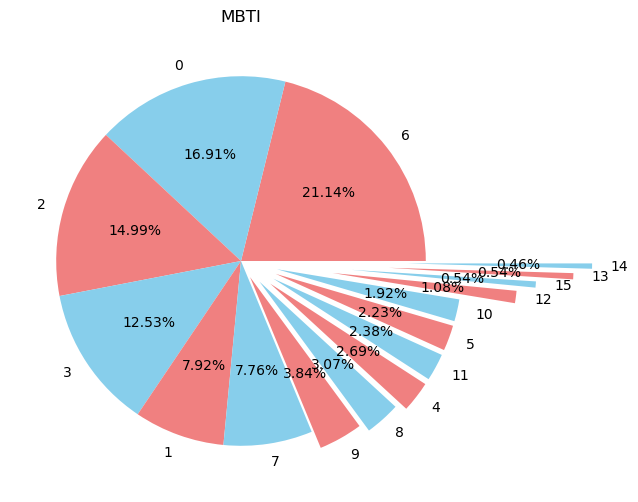

In [44]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure( figsize=(10,6) )
y_train_pd = pd.Series(y_train)
y_train_pd.value_counts().plot( kind='pie', colors=['lightcoral','skyblue'], autopct='%1.2f%%',explode = [0, 0, 0, 0, 0, 0, 0.1, 0.15, 0.2, 0.2, 0.2, 0.2, 0.5, 0.6, 0.8, 0.9])
plt.title( 'MBTI' )  # 圖標題
plt.ylabel( '' )
plt.show()

In [35]:
#上採樣
from imblearn.over_sampling import SMOTE
X_train_re = np.array(X_train).reshape(-1, 1)
y_train_re = np.array(y_train).reshape(-1, 1)
X_train_SM, y_train_SM = SMOTE().fit_resample(X_train_re, y_train_re)

X_val_re = np.array(X_val).reshape(-1, 1)
y_val_re = np.array(y_val).reshape(-1, 1)
X_val_SM, y_val_SM = SMOTE().fit_resample(X_val_re, y_val_re)

X_test_re = np.array(X_test).reshape(-1, 1)
y_test_re = np.array(y_test).reshape(-1, 1)
X_test_SM, y_test_SM = SMOTE().fit_resample(X_test_re, y_test_re)

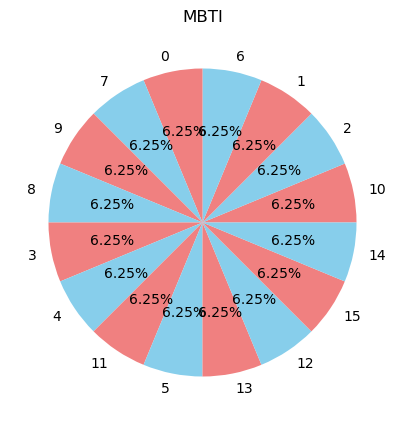

In [36]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure( figsize=(10,5) )
y_train_pd = pd.Series(y_train_SM)
y_train_pd.value_counts().plot( kind='pie', colors=['lightcoral','skyblue'], autopct='%1.2f%%' )
plt.title( 'MBTI' )  # 圖標題
plt.ylabel( '' )
plt.show()

In [37]:
#下採樣
from imblearn.under_sampling import TomekLinks
X_train_res, y_train_res = TomekLinks().fit_resample(X_train_SM, y_train_SM)
X_val_res, y_val_res = TomekLinks().fit_resample(X_val_SM, y_val_SM)
X_test_res, y_test_res = TomekLinks().fit_resample(X_test_SM, y_test_SM)

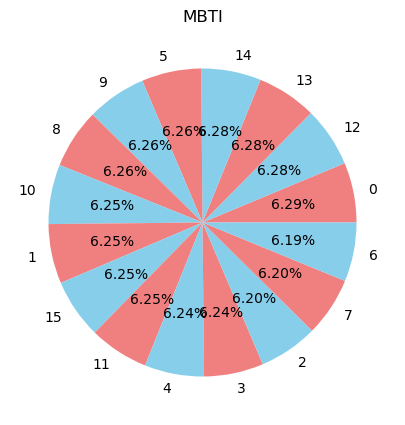

In [38]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure( figsize=(10,5) )
y_train_pd = pd.Series(y_train_res)
y_train_pd.value_counts().plot( kind='pie', colors=['lightcoral','skyblue'], autopct='%1.2f%%' )
plt.title( 'MBTI' )  # 圖標題
plt.ylabel( '' )
plt.show()

In [39]:
df['data_type'] = ['not_set']*df.shape[0]

X_train_flat = X_train_res.flatten()
X_val_flat = X_val_res.flatten()
X_test_flat = X_test_res.flatten()

df.loc[X_train_flat, 'data_type'] = 'train'
df.loc[X_val_flat, 'data_type'] = 'val'
df.loc[X_test_flat, 'data_type'] = 'test'

df.groupby(['type', 'label', 'data_type']).count()

posts  type_index
type label data_type                   
ENFJ 5     not_set        7           7
           test          45          45
           train         99          99
           val           39          39
ENFP 7     not_set       23          23
           test         193         193
           train        321         321
           val          138         138
ENTJ 4     not_set        4           4
           test          62          62
           train        121         121
           val           44          44
ENTP 1     not_set       20          20
           test         194         194
           train        324         324
           val          147         147
ESFJ 15    not_set        3           3
           test          10          10
           train         19          19
           val           10          10
ESFP 13    not_set        1           1
           test          11          11
           train         23          23
           val           13          13
ESTJ 14    not_set        1           1
           test          10          10
           train         16          16
           val           12          12
ESTP 12    not_set        1           1
           test          24          24
           train         37          37
           val           27          27
INFJ 0     test         454         454
           train        671         671
           val          344         344
INFP 6     not_set       35          35
           test         506         506
           train        940         940
           val          351         351
INTJ 3     not_set       31          31
           test         283         283
           train        542         542
           val          235         235
INTP 2     not_set       37          37
           test         348         348
           train        671         671
           val          248         248
ISFJ 10    not_set        5           5
           test          49          49
           train         81          81
           val           31          31
ISFP 8     not_set        4           4
           test          76          76
           train        131         131
           val           60          60
ISTJ 11    not_set        4           4
           test          51          51
           train         95          95
           val           55          55
ISTP 9     not_set        6           6
           test          96          96
           train        176         176
           val           59          59

In [45]:
import numpy as np

# 檢查各個標籤在不同數據集中的分布情況
print('訓練集標籤分布:', np.bincount(y_train_res.flatten()))
print('驗證集標籤分布:', np.bincount(y_val_res.flatten()))
print('測試集標籤分布:', np.bincount(y_test_res.flatten()))

訓練集標籤分布: [1282 1274 1264 1271 1272 1276 1262 1263 1275 1275 1274 1273 1280 1279
 1279 1274]
驗證集標籤分布: [275 203 194 209 199 197 188 207 207 205 210 211 213 196 228 221]
測試集標籤分布: [275 206 192 201 205 215 201 201 200 215 223 199 230 207 210 210]


In [46]:
train_df = pd.DataFrame({'feature': X_train_res.flatten(), 'label': y_train_res.flatten(), 'data_type': 'train'})
val_df = pd.DataFrame({'feature': X_val_res.flatten(), 'label': y_val_res.flatten(), 'data_type': 'val'})
test_df = pd.DataFrame({'feature': X_test_res.flatten(), 'label': y_test_res.flatten(), 'data_type': 'test'})

# 合併這些DataFrame
balanced_df = pd.concat([train_df, val_df, test_df], ignore_index=True)

In [50]:
balanced_df.groupby(['label', 'data_type']).count()

feature
label data_type         
0     test           275
      train         1282
      val            275
1     test           206
      train         1274
      val            203
2     test           192
      train         1264
      val            194
3     test           201
      train         1271
      val            209
4     test           205
      train         1272
      val            199
5     test           215
      train         1276
      val            197
6     test           201
      train         1262
      val            188
7     test           201
      train         1263
      val            207
8     test           200
      train         1275
      val            207
9     test           215
      train         1275
      val            205
10    test           223
      train         1274
      val            210
11    test           199
      train         1273
      val            211
12    test           230
      train         1280
      val            213
13    test           207
      train         1279
      val            196
14    test           210
      train         1279
      val            228
15    test           210
      train         1274
      val            221

In [51]:
# 反轉 label_dict 使其從數字映射到類型
inverse_label_dict = {v: k for k, v in label_dict.items()}

# 定義一個函數，根據 label 的值找到對應的 type
def label_to_type(label):
    return inverse_label_dict.get(label, "Unknown")  # 如果找不到對應的類型，則返回 "Unknown"

# 使用這個函數在 balanced_df 中創建一個新的列
balanced_df['type'] = balanced_df['label'].apply(label_to_type)

In [52]:
balanced_df.groupby(['type', 'label', 'data_type']).count()

feature
type label data_type         
ENFJ 5     test           215
           train         1276
           val            197
ENFP 7     test           201
           train         1263
           val            207
ENTJ 4     test           205
           train         1272
           val            199
ENTP 1     test           206
           train         1274
           val            203
ESFJ 15    test           210
           train         1274
           val            221
ESFP 13    test           207
           train         1279
           val            196
ESTJ 14    test           210
           train         1279
           val            228
ESTP 12    test           230
           train         1280
           val            213
INFJ 0     test           275
           train         1282
           val            275
INFP 6     test           201
           train         1262
           val            188
INTJ 3     test           201
           train         1271
           val            209
INTP 2     test           192
           train         1264
           val            194
ISFJ 10    test           223
           train         1274
           val            210
ISFP 8     test           200
           train         1275
           val            207
ISTJ 11    test           199
           train         1273
           val            211
ISTP 9     test           215
           train         1275
           val            205

In [53]:
df[df.data_type=='train'].posts.values

array(["What has been the most life-changing experience in your life? May the PerC Experience immerse you. Hello certain personality7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as... Welcome and stuff. Prozac, wellbrutin, at least thirty minutes of moving your legs (and I don't mean moving them while sitting in your same desk chair), weed in moderation (maybe try edibles as a healthier alternative... Basically come up with three items you've determined that each type (or whichever types you want to do) would more than likely use, given each types' cognitive functions and whatnot, when left by... All things in moderation. Sims is indeed a video game, and a good one at that. Note: a good one at that is somewhat subjective in that I am not completely promoting the death of any given Sim... Dear certain personality: What were your favorite video games 

In [56]:
balanced_df[balanced_df.data_type=='train'].feature.values

array([5026, 3055, 4024, ..., 8425, 6149, 2029], dtype=int64)